In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env as e
import wrangle as w
from scipy.stats import spearmanr
import random
import explore_regression as e
import time

In [2]:
df = w.get_zillow_data()

In [3]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [4]:
df = w.prep_zillow(df)

In [5]:
df.head()

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [6]:
train, validate, test = w.splitting_data(df)

In [7]:
train.sample(5)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
936419,3,2.5,1850,403190,2001,4249.10,Ventura
881938,4,2.5,2657,476344,1979,4854.74,Orange
1437918,4,3.0,1728,449267,1968,5892.84,LA
1658448,4,3.0,2737,583768,1986,6535.98,Ventura
741246,5,4.5,5967,1069953,1989,11331.22,Orange


Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [8]:
zillow_corr = train.drop(columns='county').corr(method='spearman')
zillow_corr

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount
bedrooms,1.000000,0.634325,0.655177,0.294890,0.426686,0.296517
bathrooms,0.634325,1.000000,0.825829,0.481681,0.570556,0.481348
area,0.655177,0.825829,1.000000,0.522849,0.512383,0.520506
salesamount,0.294890,0.481681,0.522849,1.000000,0.289789,0.978555
yearbuilt,0.426686,0.570556,0.512383,0.289789,1.000000,0.288274
taxamount,0.296517,0.481348,0.520506,0.978555,0.288274,1.000000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


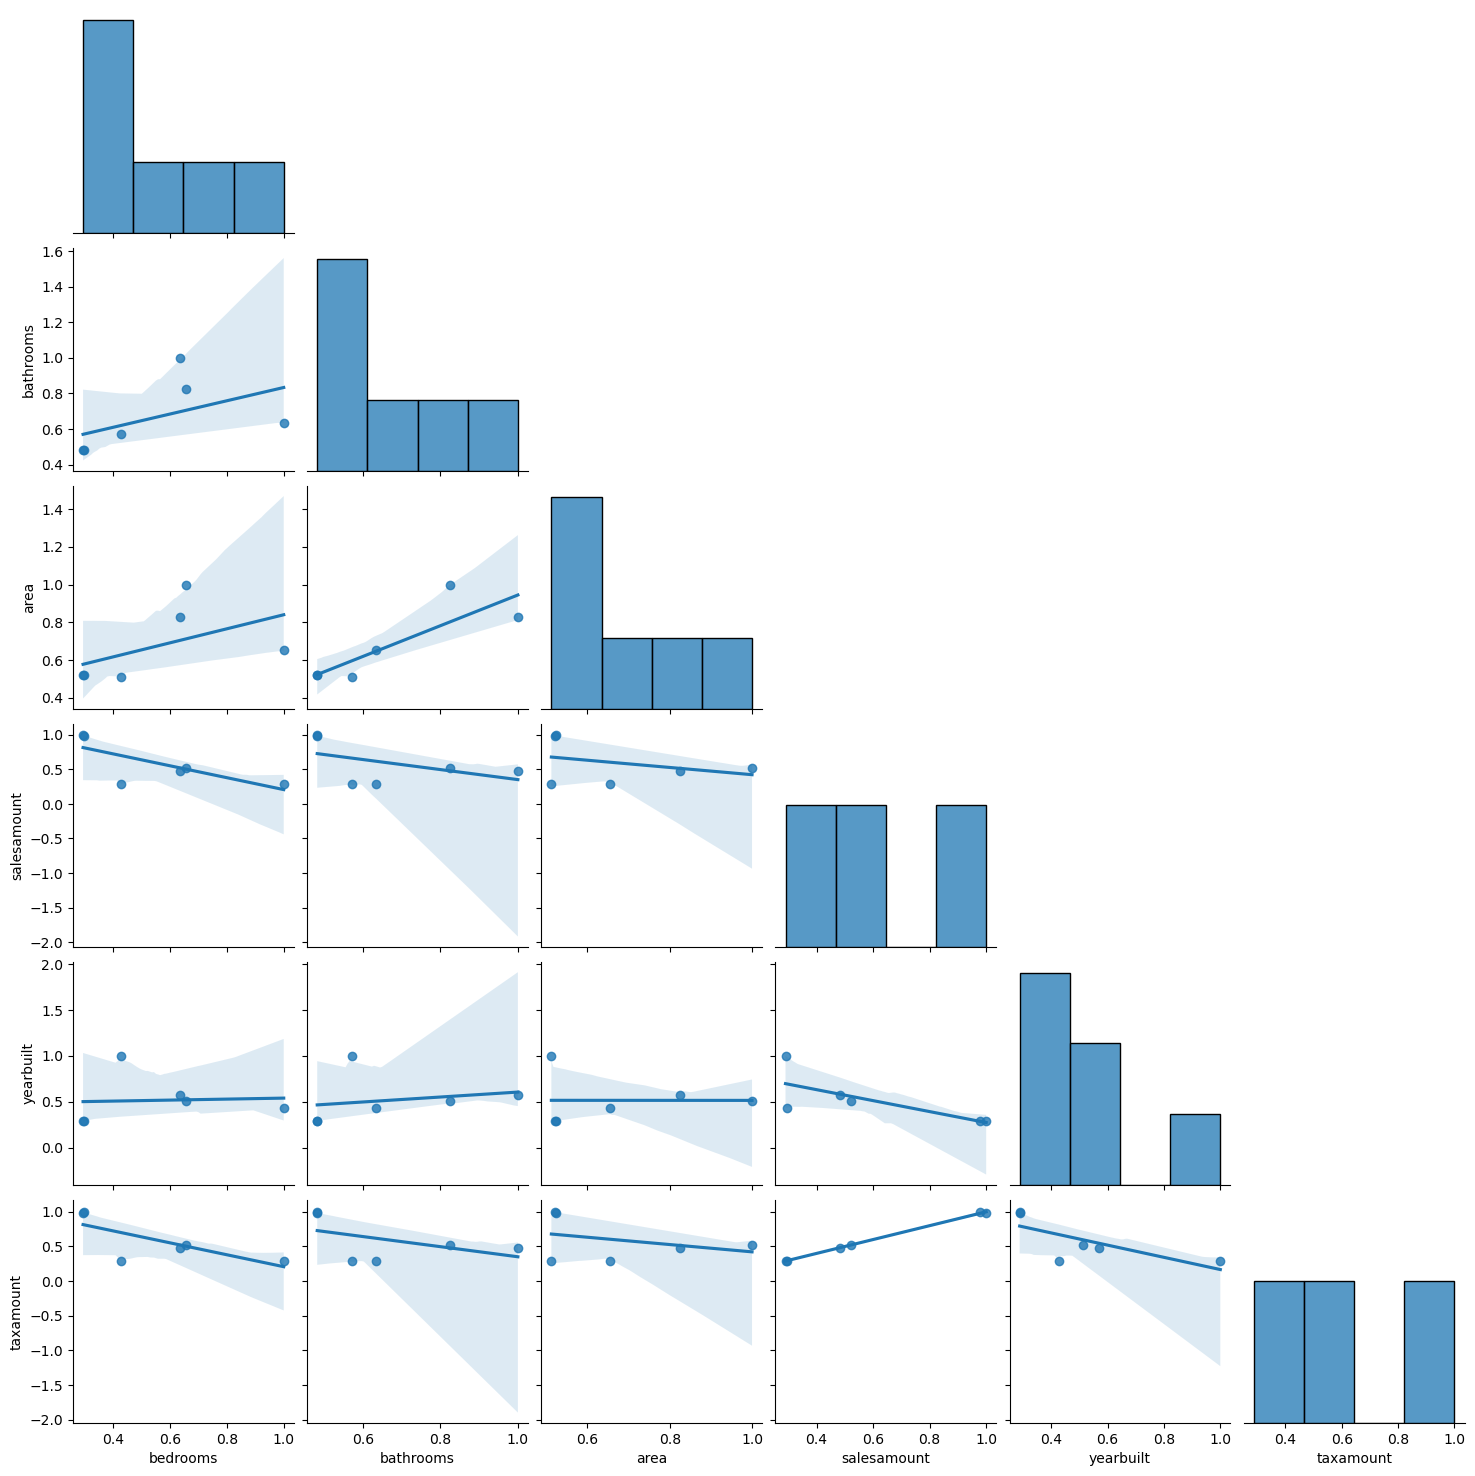

In [9]:
e.plot_variable_pairs(zillow_corr)

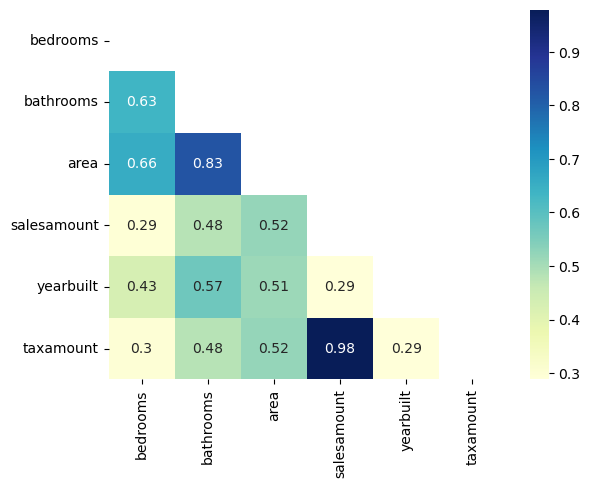

In [10]:
sns.heatmap(zillow_corr, cmap='YlGnBu', annot=True, mask=np.triu(zillow_corr))
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


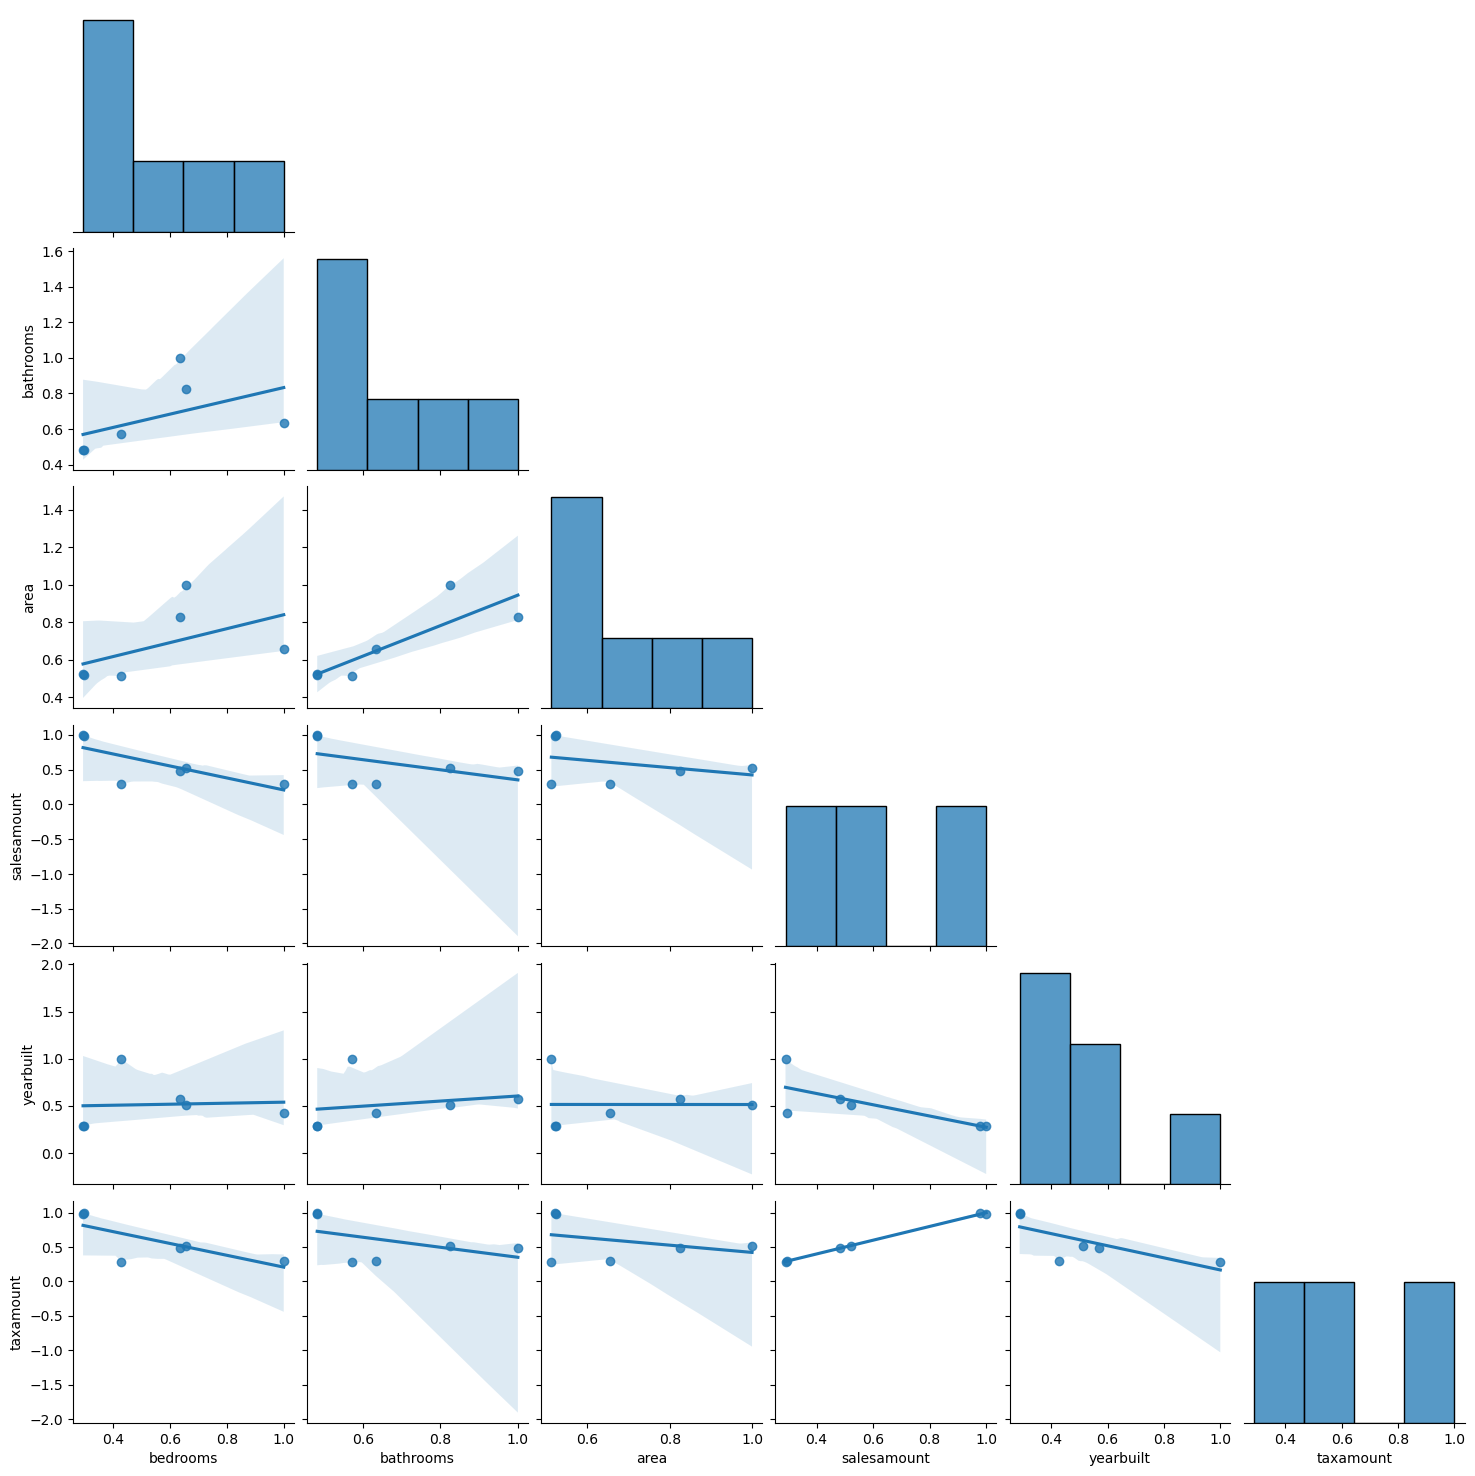

In [11]:
def plot_variable_pairs(zillow_corr):
    sns.pairplot(data=zillow_corr, kind='reg', corner=True)
    return plt.show()
plot_variable_pairs(zillow_corr)

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

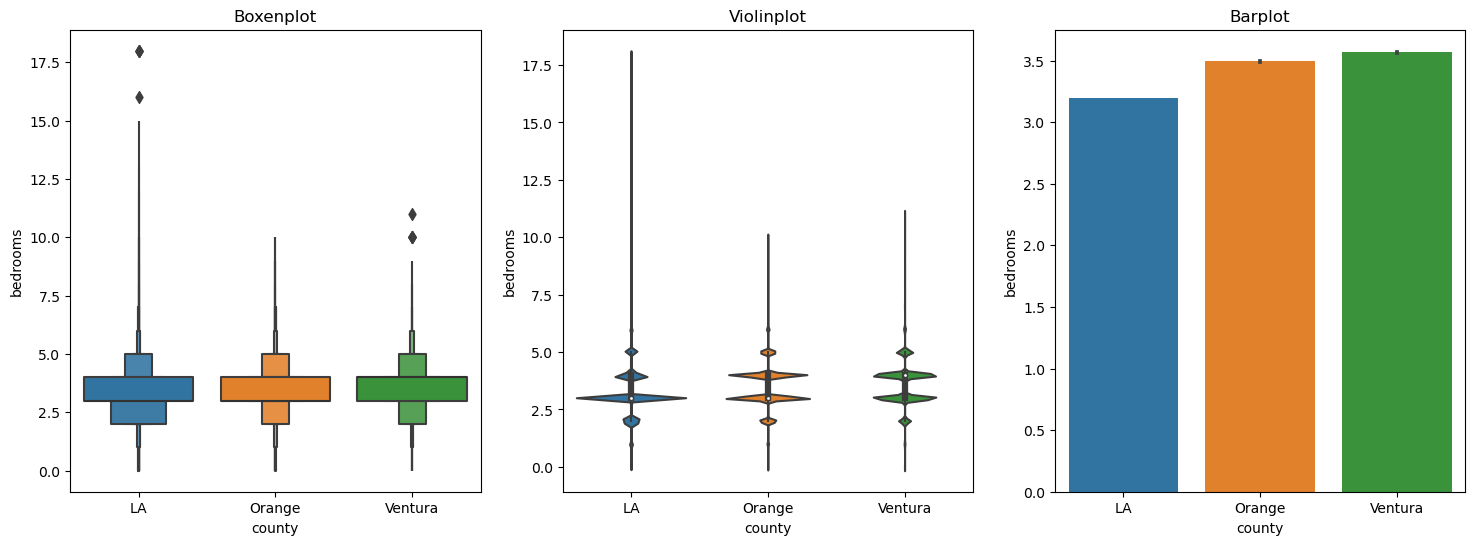

In [12]:
%timeit
e.plot_categorical_and_continuous_vars(train, 'county', 'bedrooms')

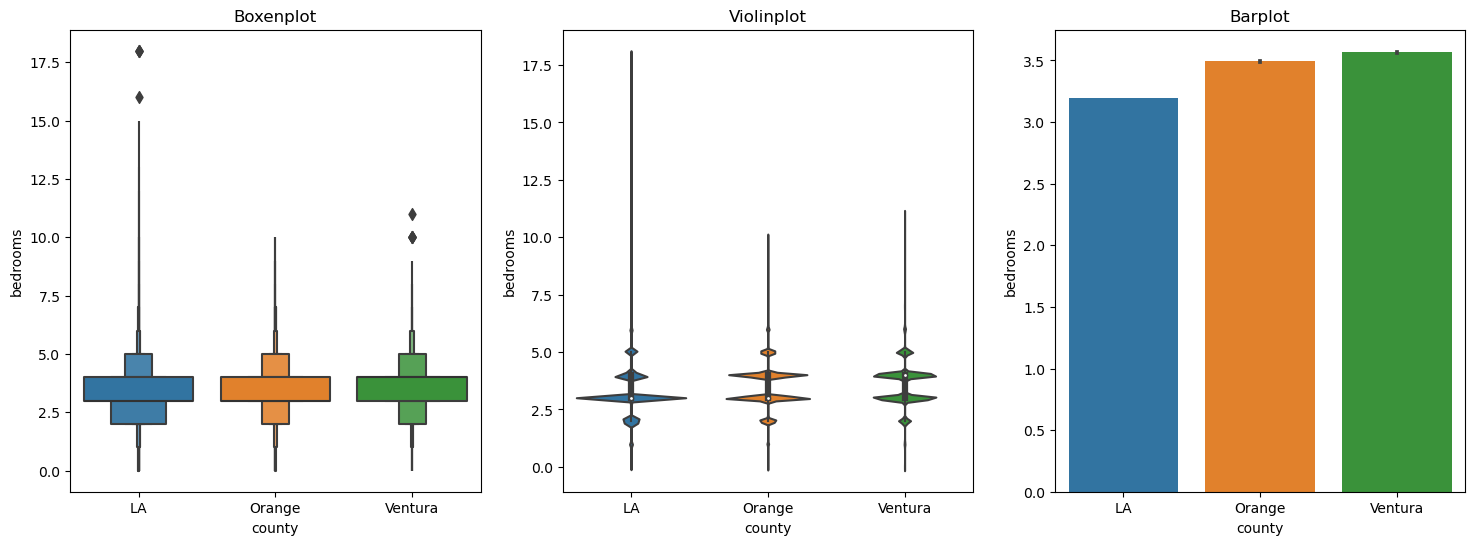

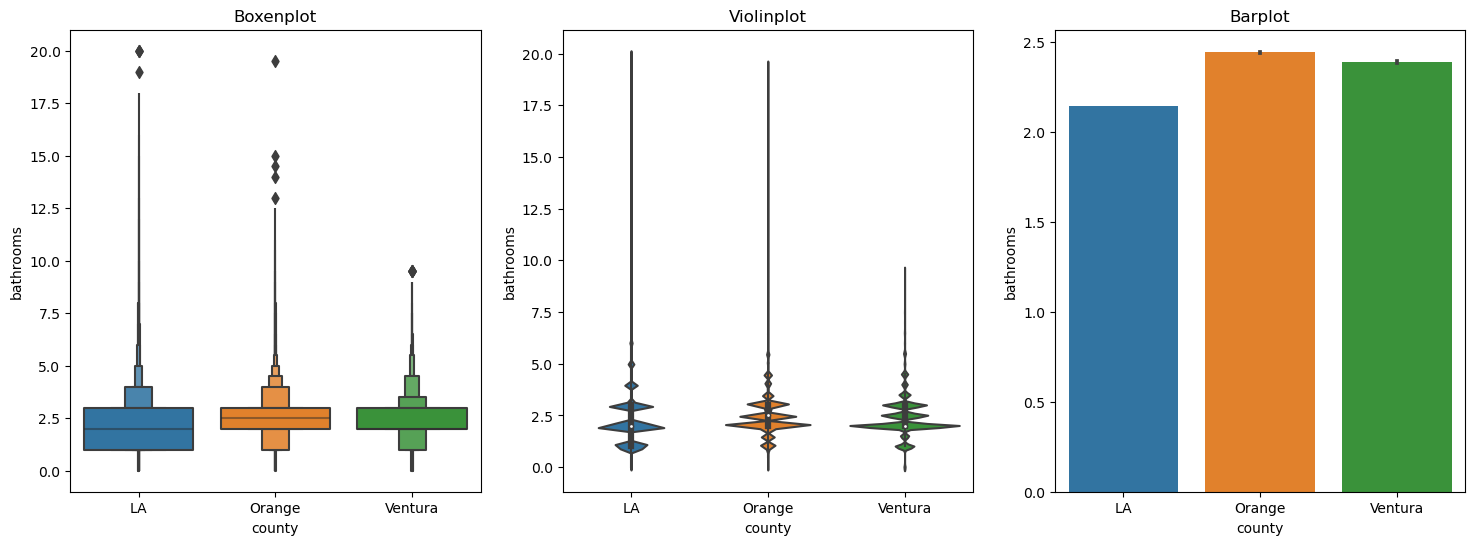

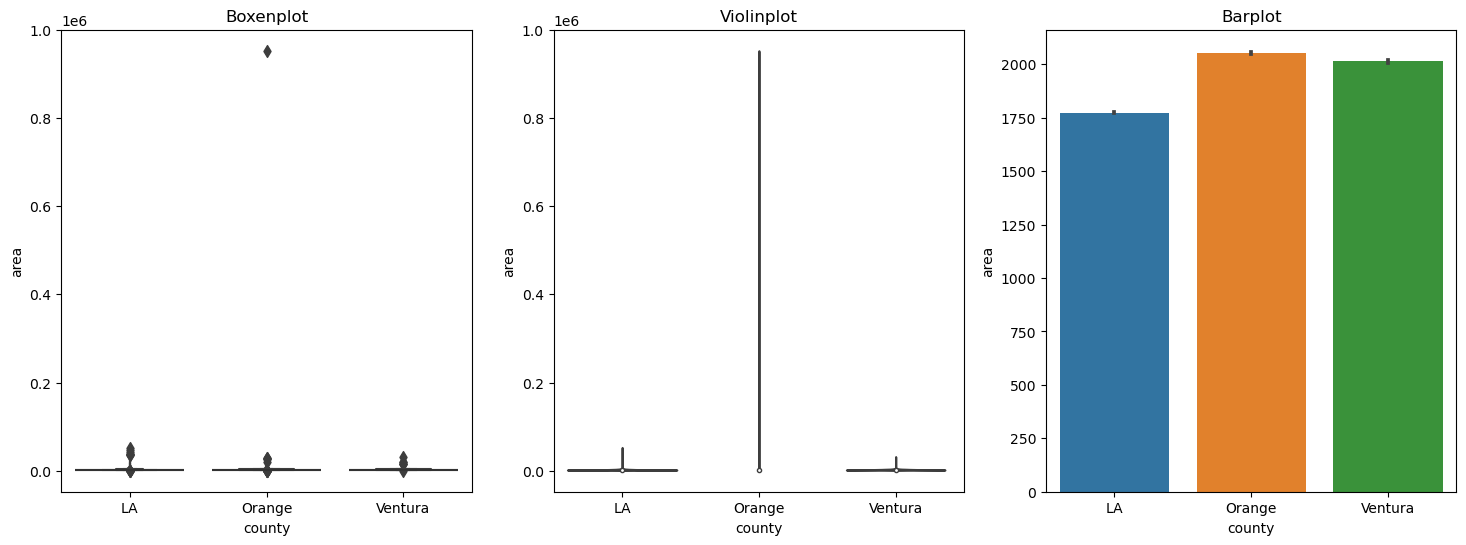

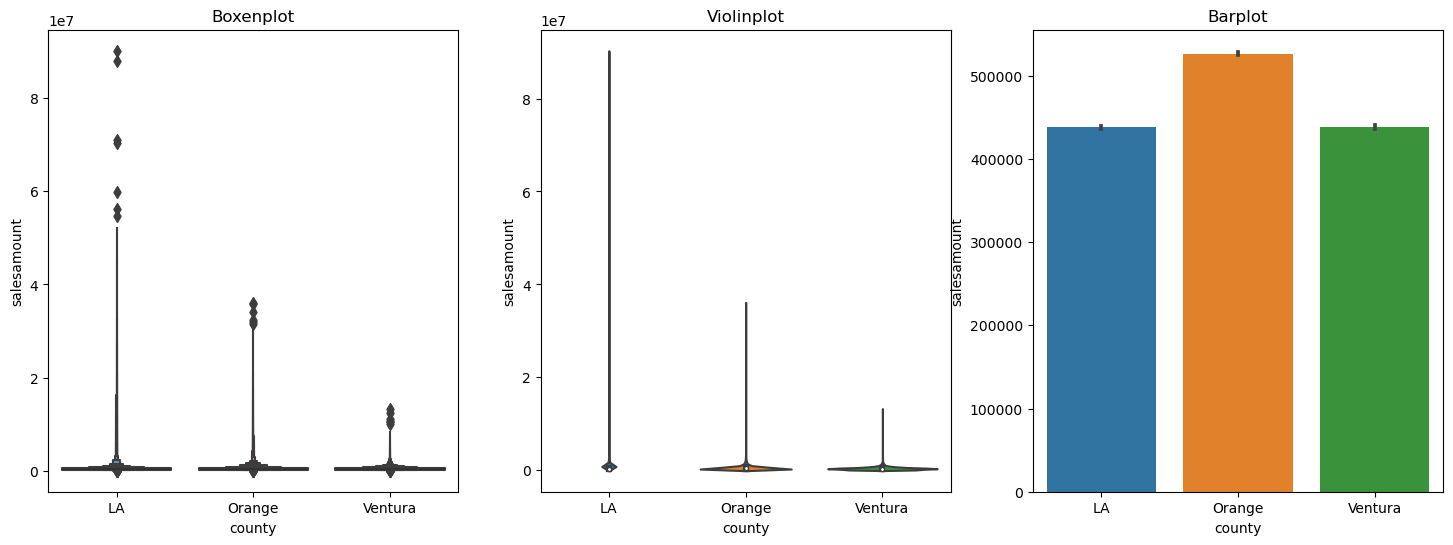

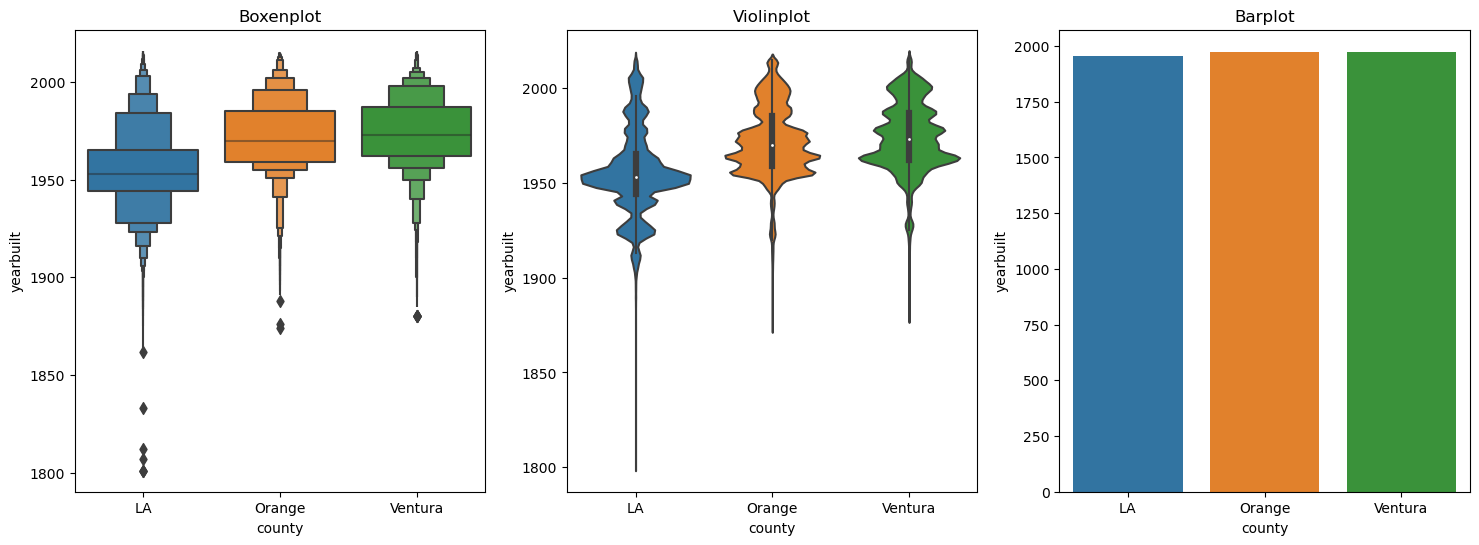

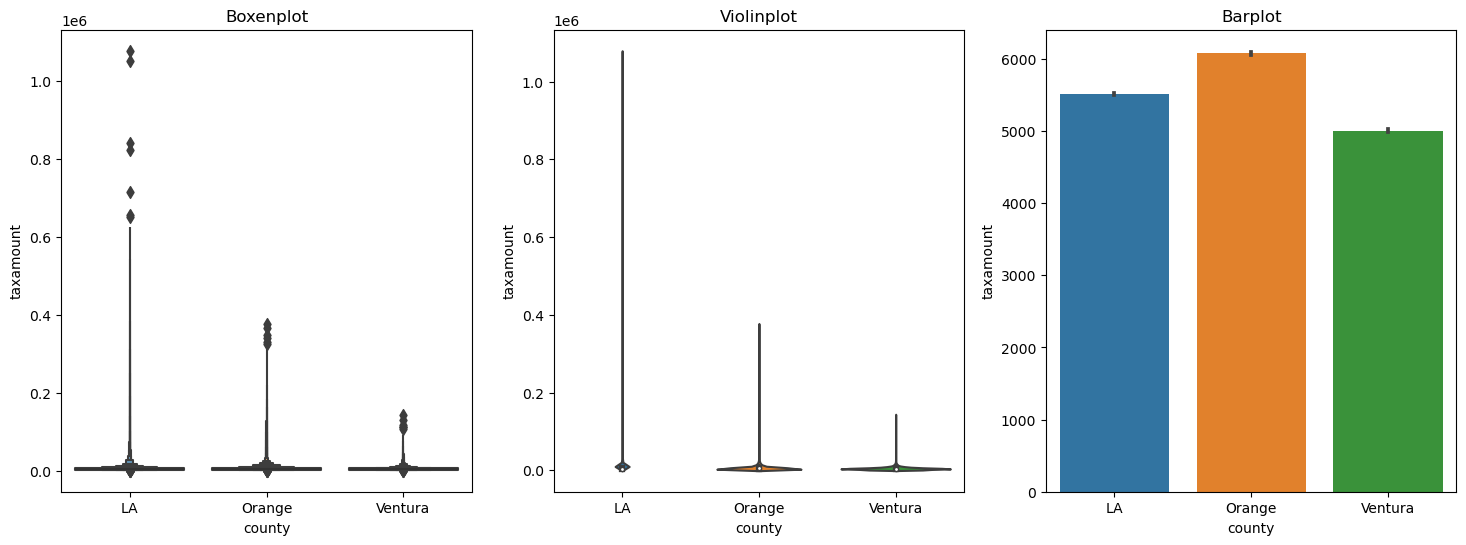

In [13]:
cols = train.drop(columns='county').columns
for col in cols:
    e.plot_categorical_and_continuous_vars(train, train.county, col)

In [14]:
from scipy.stats import spearmanr

# Assuming 'property_value' is the property value column and 'location' is the county/region column
spearman_corr, p_value = spearmanr(train['salesamount'], train['county'])
print(f"Spearman's correlation coefficient: {spearman_corr}")
print(f"P-value: {p_value}")


Spearman's correlation coefficient: 0.1511184932347116
P-value: 0.0


In [15]:
α = .05

In [16]:
if p_value < α:
    print('reject the null')
else:
    print('accept the null')

reject the null


In [17]:
from scipy.stats import spearmanr

# Assuming 'train' is your dataframe and 'salesamount' is the property value column
property_value_column = 'salesamount'

# Get continuous columns (excluding 'property_value')
continuous_columns = [col for col in train.columns if train[col].dtype != 'category' and col != property_value_column]

# Calculate Spearman's correlation for each continuous variable with 'property_value'
for col in continuous_columns:
    spearman_corr, p_value = spearmanr(train[col], train[property_value_column])
    print(f"Spearman's correlation coefficient between '{col}' and 'salesamount': {spearman_corr}")
    print(f"P-value: {p_value}")
    print('\n')


Spearman's correlation coefficient between 'bedrooms' and 'salesamount': 0.29489028110793647
P-value: 0.0


Spearman's correlation coefficient between 'bathrooms' and 'salesamount': 0.481681418679158
P-value: 0.0


Spearman's correlation coefficient between 'area' and 'salesamount': 0.5228486313672851
P-value: 0.0


Spearman's correlation coefficient between 'yearbuilt' and 'salesamount': 0.2897886604504915
P-value: 0.0


Spearman's correlation coefficient between 'taxamount' and 'salesamount': 0.9785549998968646
P-value: 0.0


Spearman's correlation coefficient between 'county' and 'salesamount': 0.15111849323471158
P-value: 0.0




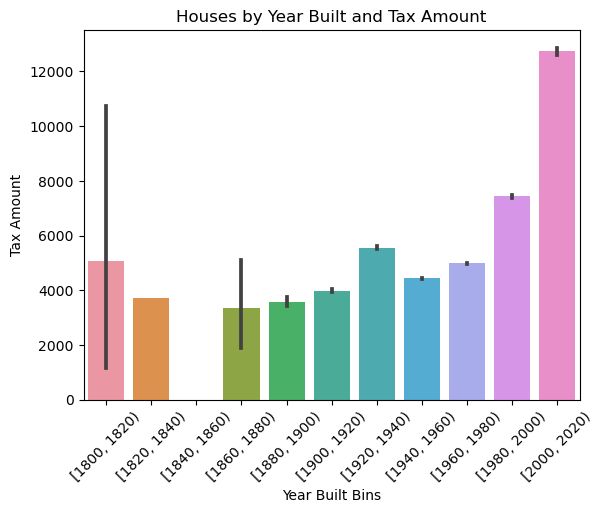

In [18]:
# Assuming 'yearbuilt' and 'taxamount' are columns in your DataFrame
# Create a new DataFrame with counts for each combination of 'yearbuilt' and 'taxamount'

# Binning the 'yearbuilt' column
train['yearbins'] = pd.cut(train['yearbuilt'], bins=range(1800, 2030, 20), right=False)

# Create a bar plot
sns.barplot(data=train, x='yearbins', y='taxamount')

# Add a horizontal line for mean (replace 'mean4' with your actual mean value)
#plt.axhline(200, color='red', linestyle='dashed', linewidth=2, label="Tax Amount Mean")

# Add labels and title
plt.xlabel('Year Built Bins')
plt.ylabel('Tax Amount')
plt.title('Houses by Year Built and Tax Amount')

# Show legend
#plt.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

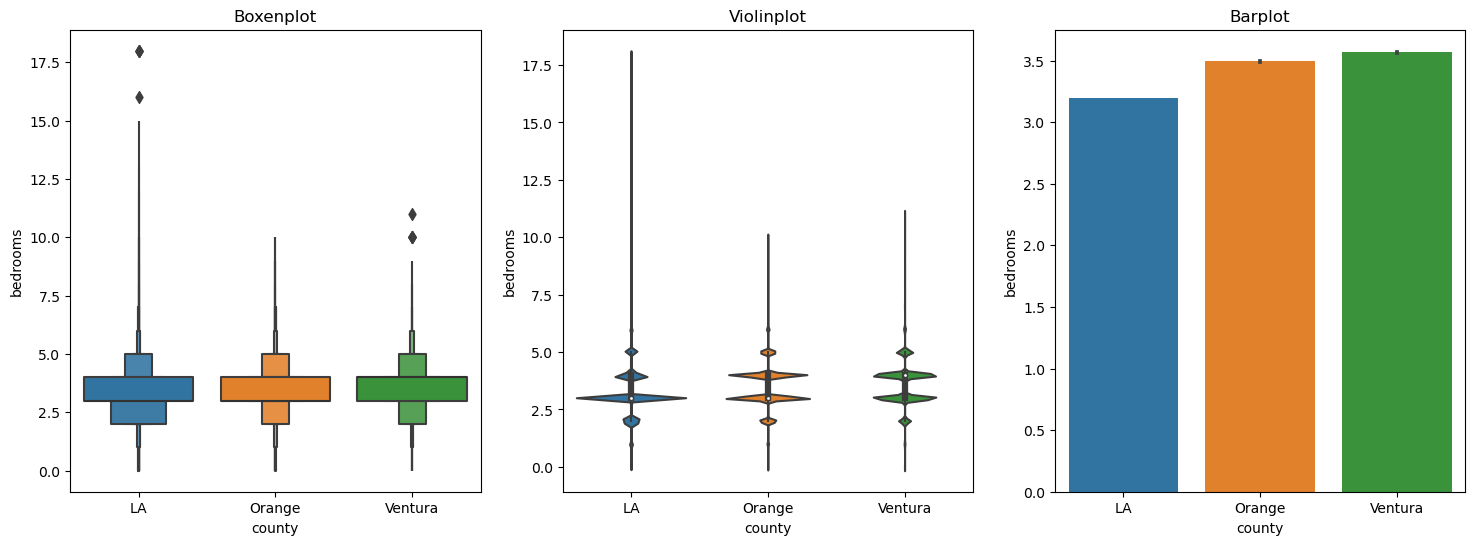

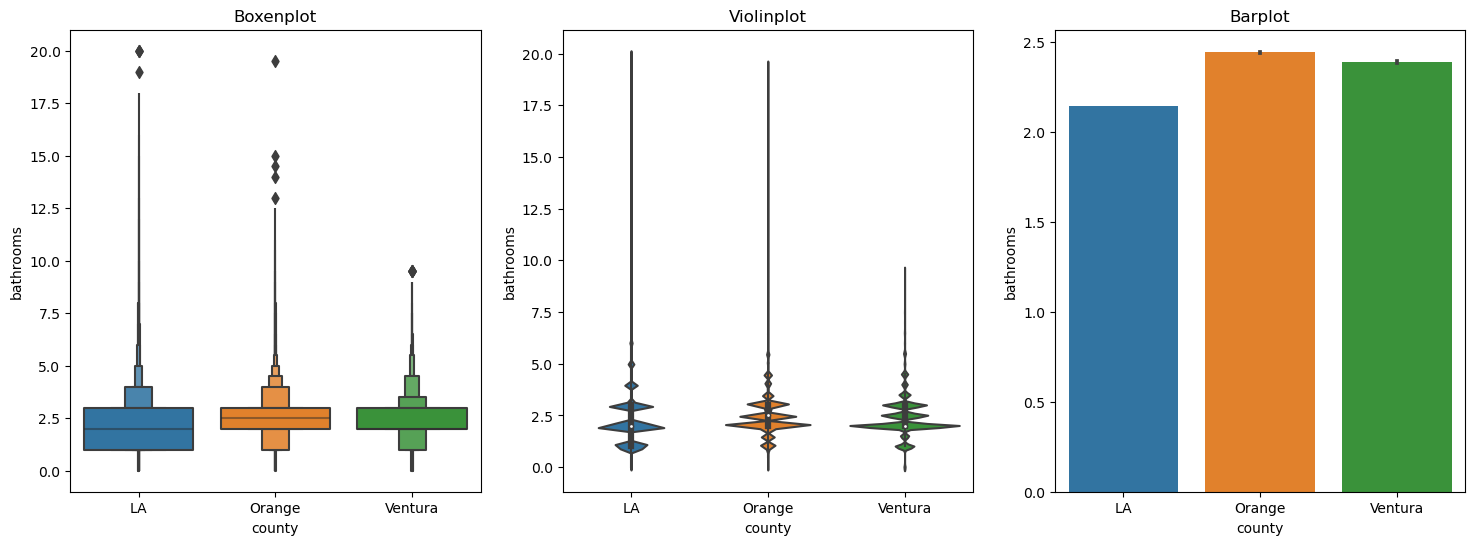

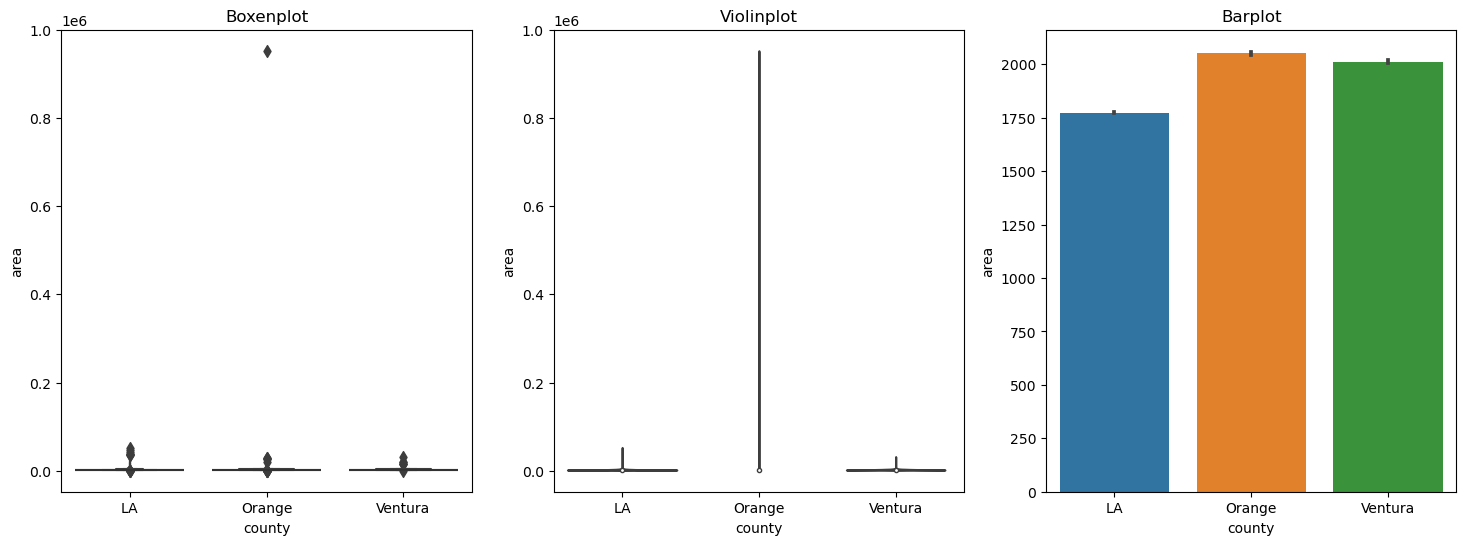

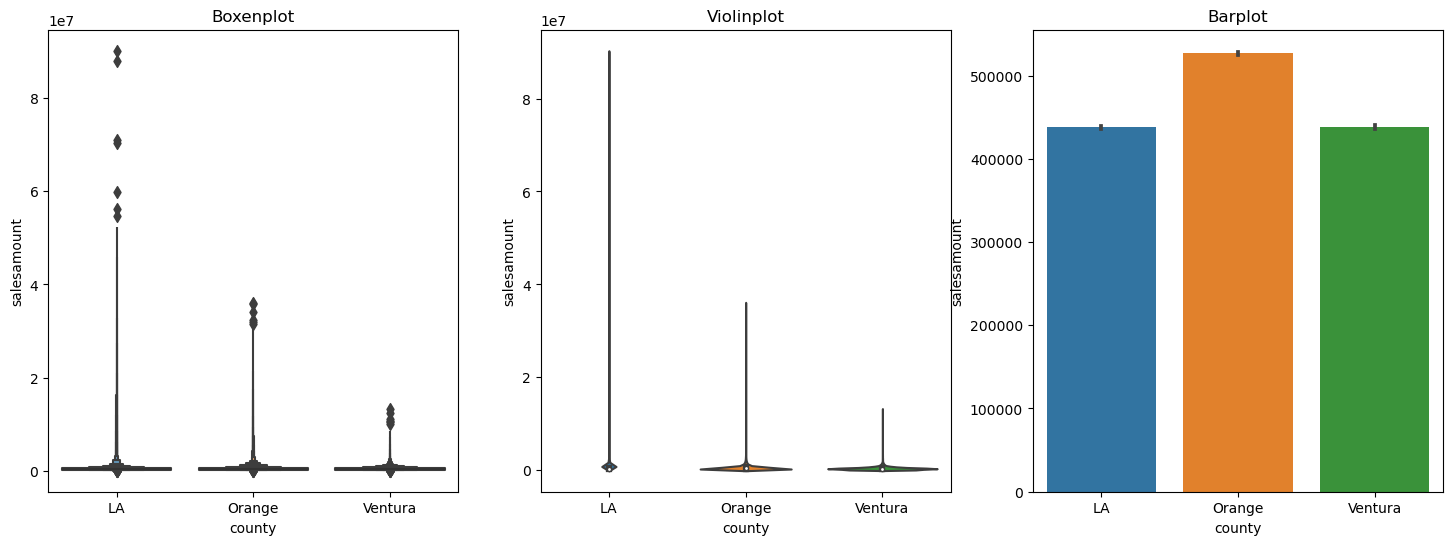

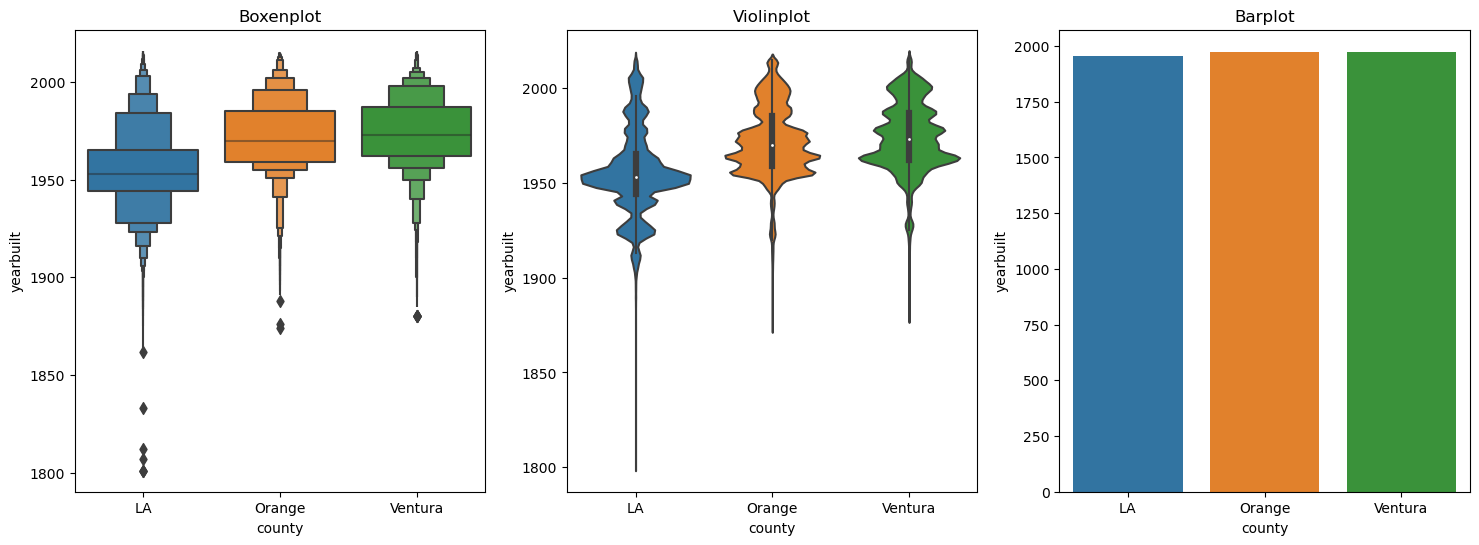

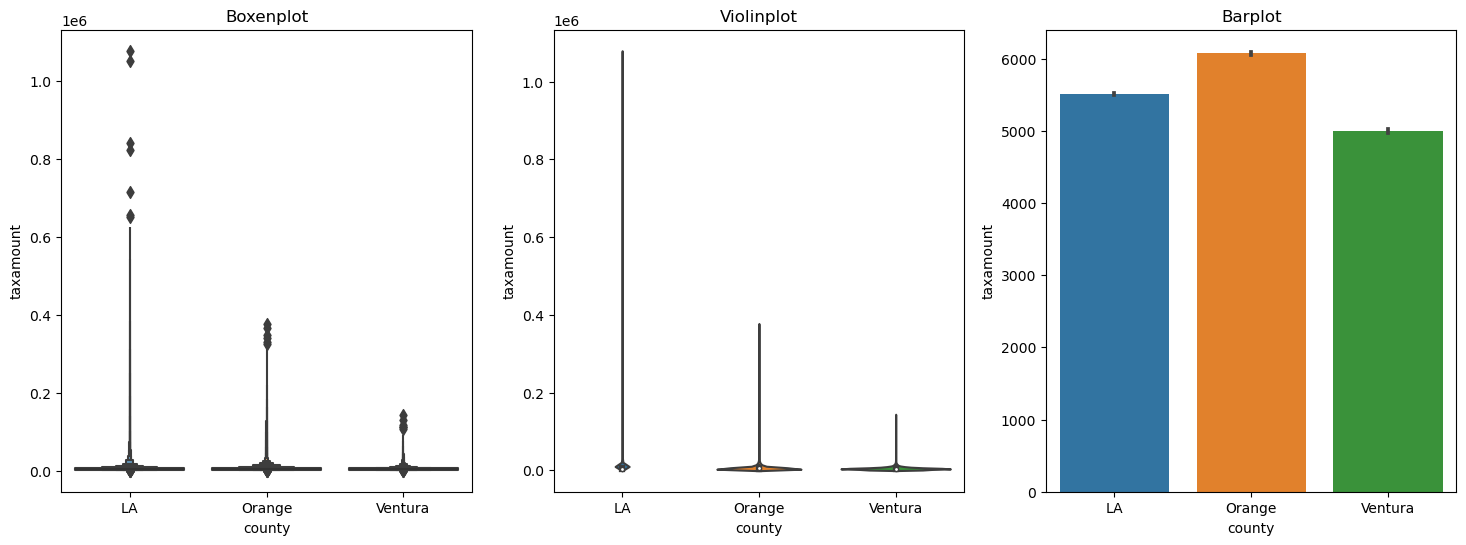

TypeError: Neither the `x` nor `y` variable appears to be numeric.

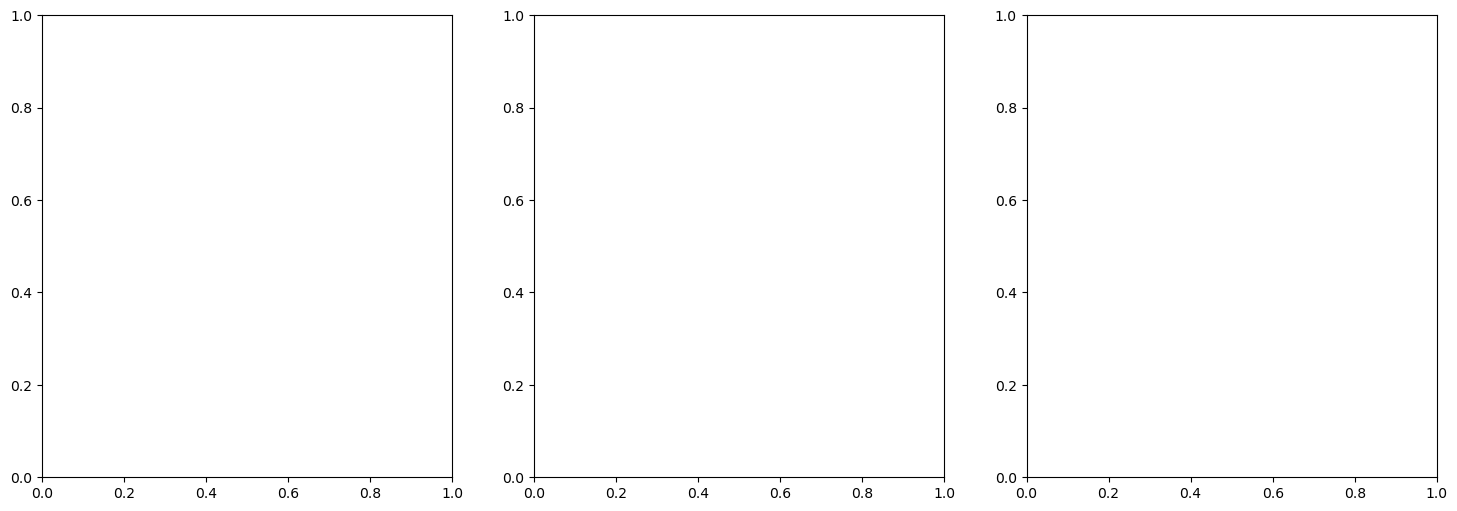

In [19]:
e.visualize(train)

In [ ]:
seconds = time.time()
local_time = time.ctime(seconds)
print(local_time)

timeit will give you an approximation of how long it takes to execute a cell, the tactic that I find a little more useful is to import time, assign time_before to time.time(), do the thing, assign time_after to time.time(), then use the difference between the two


In [ ]:
time_before = time.time()

time_after = time.time()

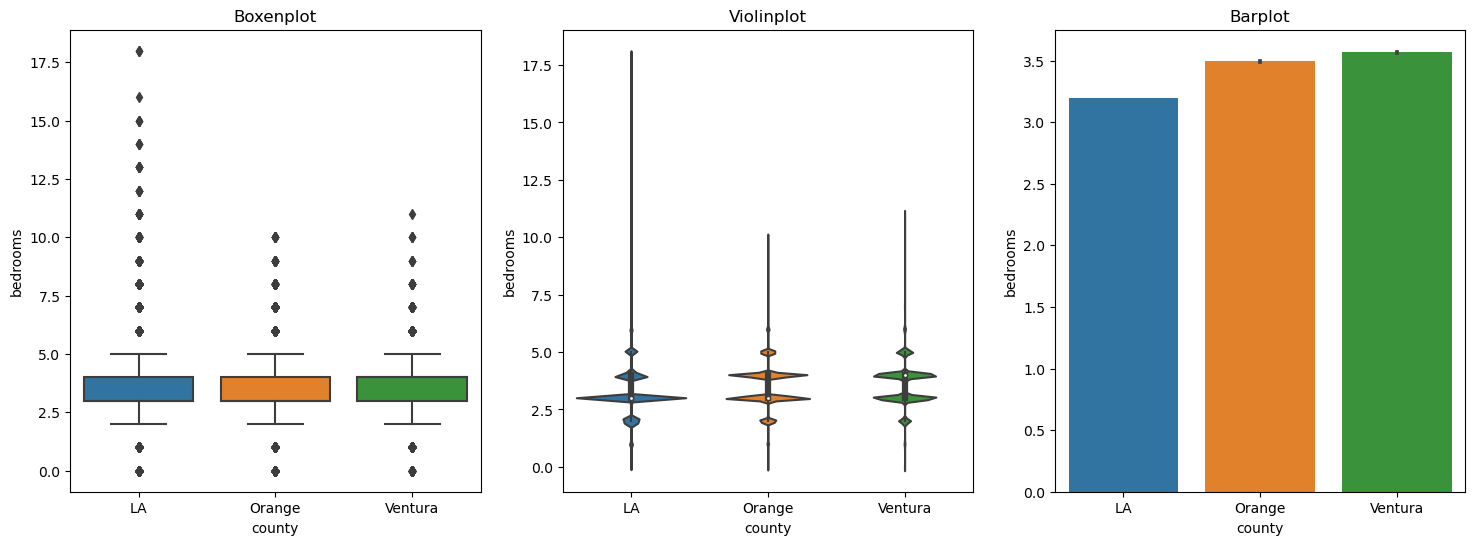

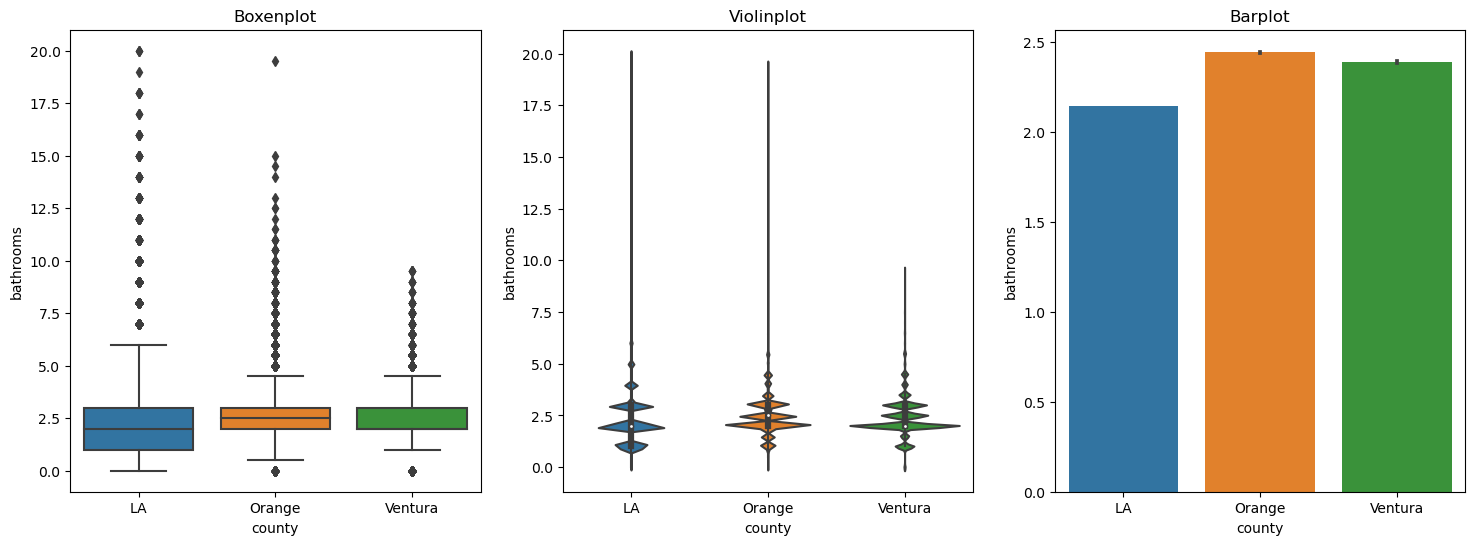

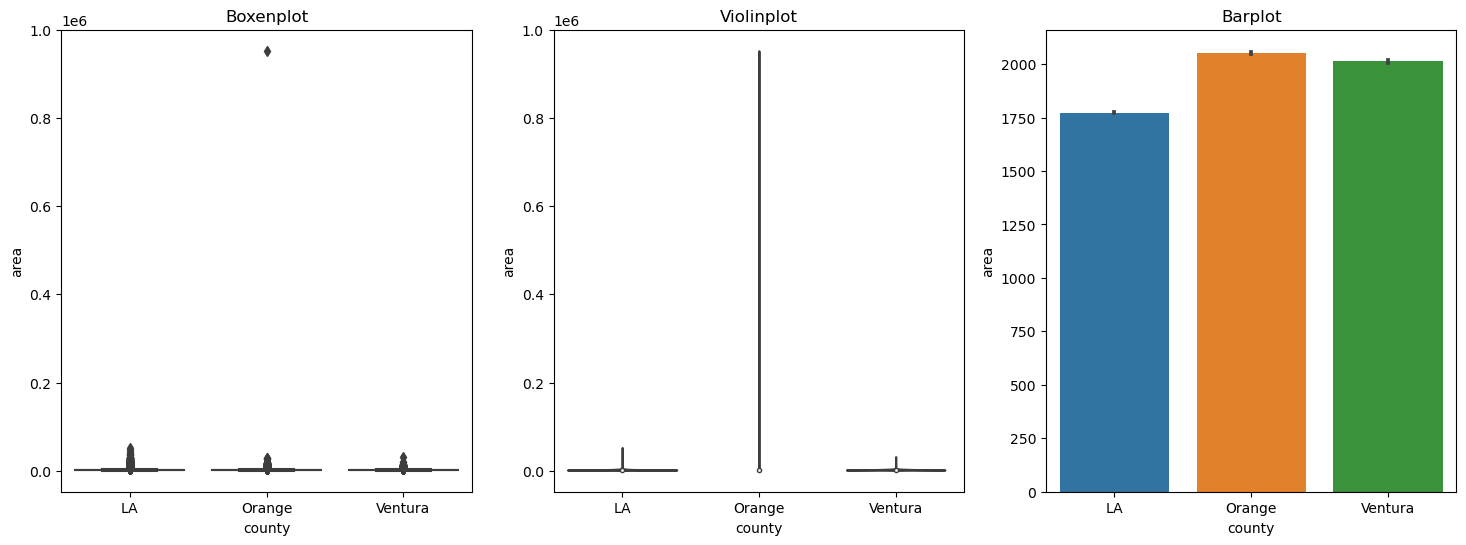

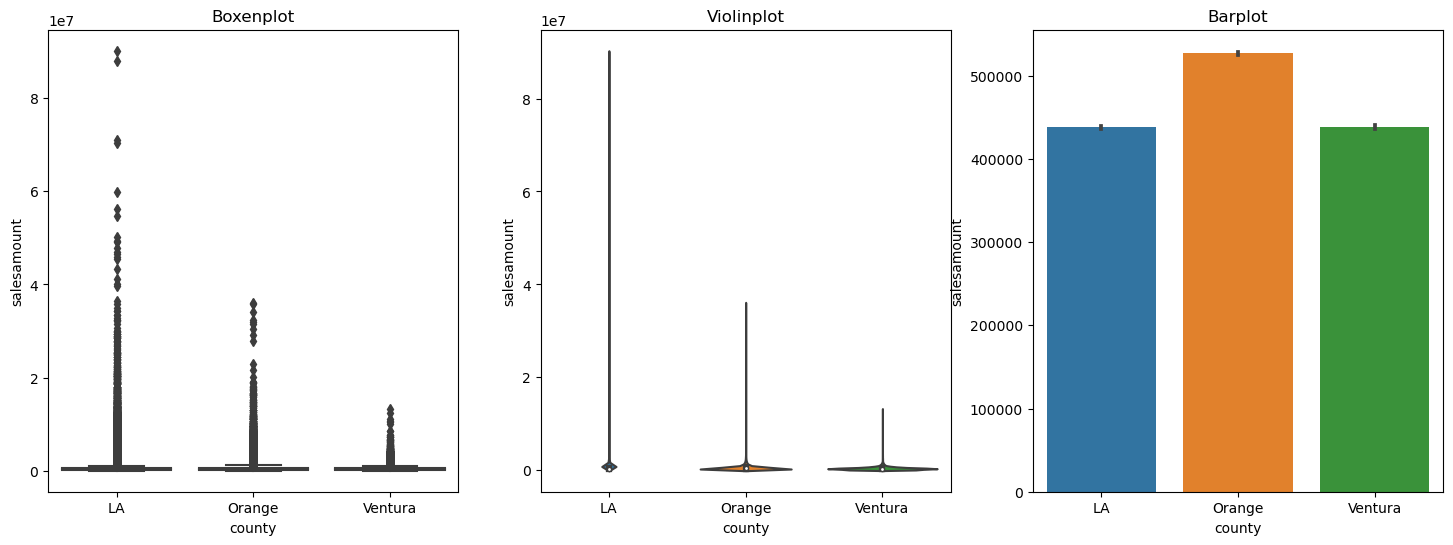

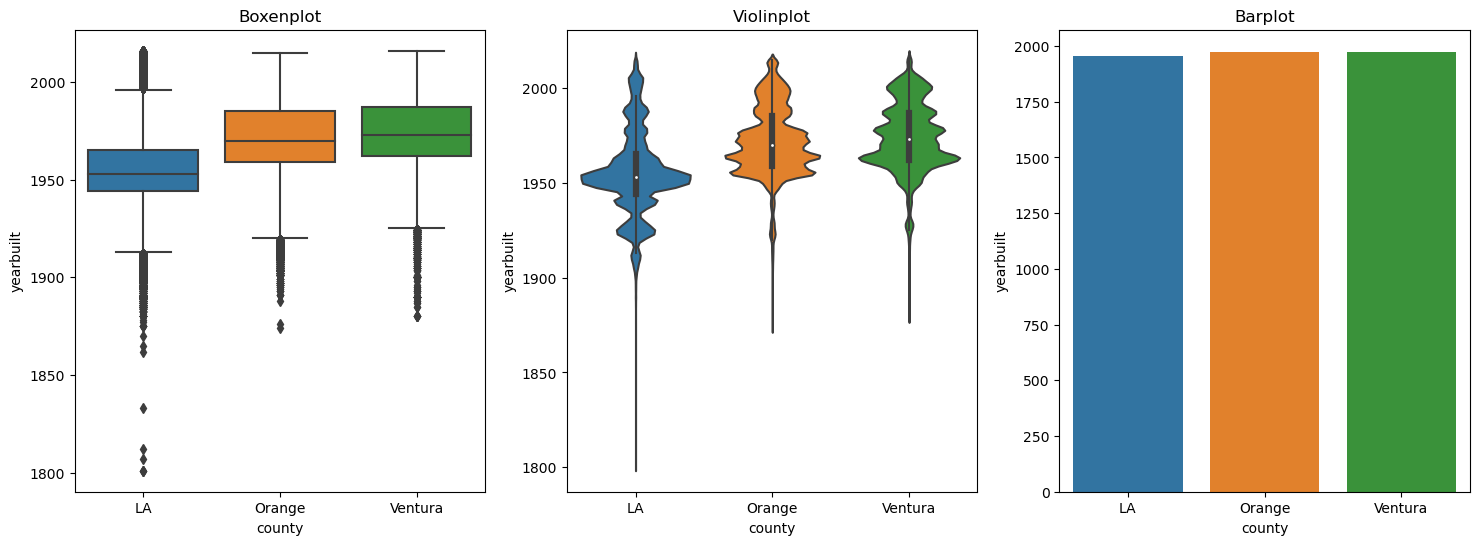

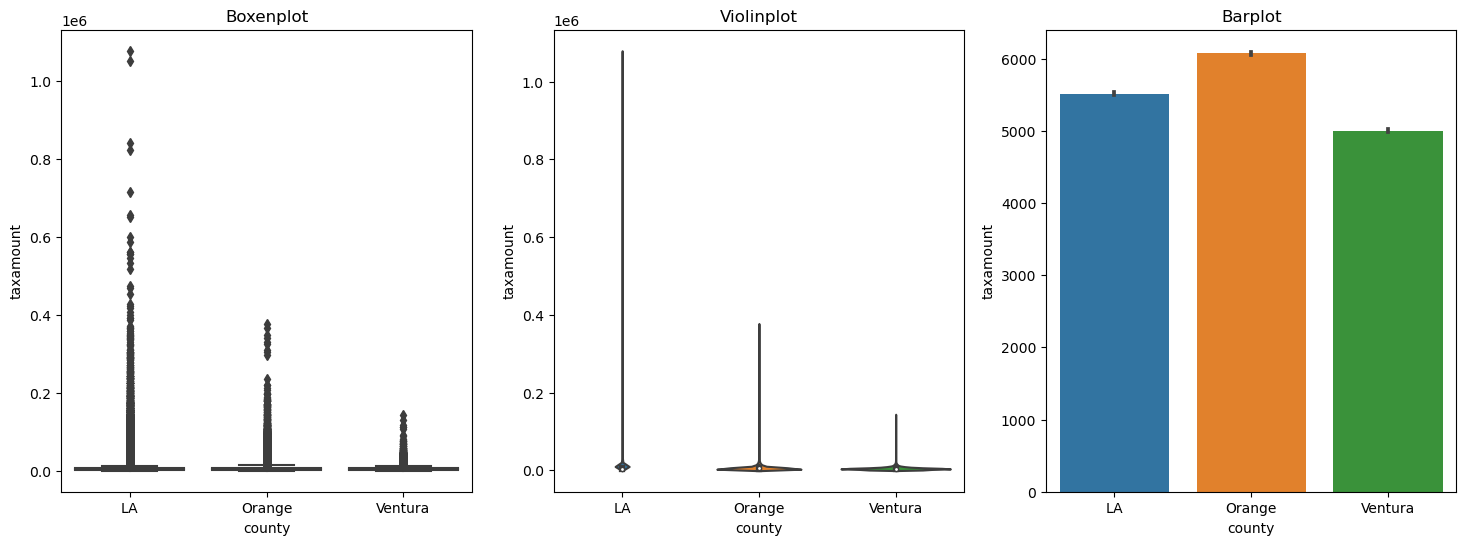

59.19980597496033


In [11]:
time_beginning = time.time()
e.visualize(train)
time_after = time.time()
time_taken = time_after-time_beginning
print(time_taken)